In [1]:
""" Resize the notbook to full width, to fit more code and images """
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

""" some basic packages and settings to show images inline """
import numpy as np
import torch

import lovely_tensors as lt
lt.monkey_patch()
from lovely_numpy import lo

%matplotlib inline
import matplotlib.pyplot as plt

""" automatically reload included modules (need to run import command to trigger reloading) """
%load_ext autoreload
%autoreload 2

""" Controls for figure sizes to change """
import matplotlib
plt.rcParams.update({'errorbar.capsize': 1})
# VoMi: Configure figure fonts
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['cmr10']  # This sets the Computer Modern Roman font
matplotlib.rcParams['text.usetex'] = False  # Ensure LaTeX is not being used for rendering
matplotlib.rcParams['axes.unicode_minus'] = False

# Alternatively, you can specify other font properties if needed
matplotlib.rcParams['font.size'] = 14  # Set the global font size
matplotlib.rcParams['axes.titlesize'] = 14  # Set the axes title font size
matplotlib.rcParams['axes.labelsize'] = 12  # Set the axes labels font size
matplotlib.rcParams['xtick.labelsize'] = 12  # Set the x-tick labels font size
matplotlib.rcParams['ytick.labelsize'] = 12  # Set the y-tick labels font size
matplotlib.rcParams['legend.fontsize'] = 12  # Set the legend font size

""" Lab support code """
from lab import test_set, load_net

def save_jpg(file_name):
    plt.savefig(file_name, bbox_inches='tight', dpi=199, pad_inches=0)

Using device: cpu


## Retrieval

In [2]:
# VoMi: for triplet model you will need to implement 'triplet_loss' and 'train_triplet' in lab.py
# VoMi: for smoothAP model you will need to implement 'smooth_AP_loss' and 'train_smooth_AP' in lab.py

# net = load_net('./models/net_class.pl') # load pretrained classification network
# net = load_net('./models/net_triplet.pl') # load network trained with triplet loss
# net = load_net('./models/net_smoothAP.pl') # load network trained with smoothAP loss

### Show nearest neighbours

In [3]:
np.random.seed(0)
torch.manual_seed(0)

print(f'{len(test_set) = }')

query_idxs = np.random.choice(len(test_set), size=10, replace=False)
print(f'{query_idxs = }')

# indices of query images


# Not really needed for anything, everything is calculated in show_nearest


# extract features for all test_samples
#from lab import get_features, distances
#loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False, num_workers=0)
#features, labels = get_features(net, test_set)

len(test_set) = 1000
query_idxs = array([993, 859, 298, 553, 672, 971,  27, 231, 306, 706])


In [4]:
def show_nearest(test_set, labels, query_idxs, dists):
    # show 50 nearest retrived images for every query in query_idxs
    N = 50

    f, axarr = plt.subplots(len(query_idxs), 1, gridspec_kw = {'wspace':0, 'hspace':0}, figsize=(16,4), dpi=200)

    num_correct = np.zeros((len(query_idxs), ), dtype=np.int32)

    for i, qidx in enumerate(query_idxs):
        ax = axarr[i]
        d = dists[qidx, :]
        ds = torch.argsort(d)[:N+1]     # N+1 because the query image is retrieved as well
        img = np.ones((28, 28*(N+1)+10, 3))
        sid = 0
        qimg = ((test_set[qidx][0] * 0.5) + 0.5).cpu().detach().numpy()
        img[:, sid:sid+28, :] = np.stack((qimg, qimg, qimg), axis=-1)   # expand to three channels
        qlab = labels[qidx]
        sid += 28+10
        for di in ds:
            if di == qidx:  # skip the query image
                continue
            retrieved_img = ((test_set[di][0] * 0.5) + 0.5).cpu().detach().numpy()[0, :, :]
            retrieved_img = np.stack((retrieved_img, retrieved_img, retrieved_img), axis=-1)
            # start with a black frame
            retrieved_img[:1, :, :] = 0
            retrieved_img[-1:, :, :] = 0
            retrieved_img[:, :1, :] = 0
            retrieved_img[:, -1:, :] = 0
            lab = labels[di]
            if lab == qlab:     # correct -> green frame
                retrieved_img[:1, :, 1] = 1
                retrieved_img[-1:, :, 1] = 1
                retrieved_img[:, :1, 1] = 1
                retrieved_img[:, -1:, 1] = 1
                num_correct[i] += 1
            else:       # incorrect -> red frame
                retrieved_img[:1, :, 0] = 1
                retrieved_img[-1:, :, 0] = 1
                retrieved_img[:, :1, 0] = 1
                retrieved_img[:, -1:, 0] = 1
            img[:, sid:sid+28] = retrieved_img
            sid += 28
        ax.imshow(img)
        ax.axis('off')

    return num_correct

In [5]:
import lab

def retrieve_for(net, test_set, name):

    features, labels = lab.get_features(net, test_set)
    print(f'{features = }')
    print(f'{labels = }')
    
    # VoMi: implement 'distances' function in lab.py
    dists = lab.distances(features, features)
    print(f'{dists = }')
    num_correct = show_nearest(test_set, labels, query_idxs, dists)
    save_jpg(f'figures/retrieved-{name}.jpg')
    print(f'{num_correct = }')
    mAP, mPrec, mRec = lab.evaluate_mAP(net, test_set)
    print(f'{mAP = }')
    print(f'{mPrec = }')
    print(f'{mRec = }')

# Plot results for all nets

features = tensor[1000, 256] n=256000 (1.0Mb) x∈[0., 0.802] μ=0.015 σ=0.061 grad DivBackward0
labels = tensor[1000] i64 7.8Kb x∈[0, 9] μ=4.500 σ=2.874
dists = tensor[1000, 1000] n=1000000 (3.8Mb) x∈[0., 1.414] μ=1.244 σ=0.206 grad ViewBackward0
num_correct = array([48, 48, 10, 48, 10, 50, 46, 44, 43, 23])
mAP = tensor f64 0.635
mPrec = tensor[999] f64 7.8Kb x∈[0.099, 0.804] μ=0.264 σ=0.181
mRec = tensor[999] f64 7.8Kb x∈[0.008, 1.000] μ=0.865 σ=0.205


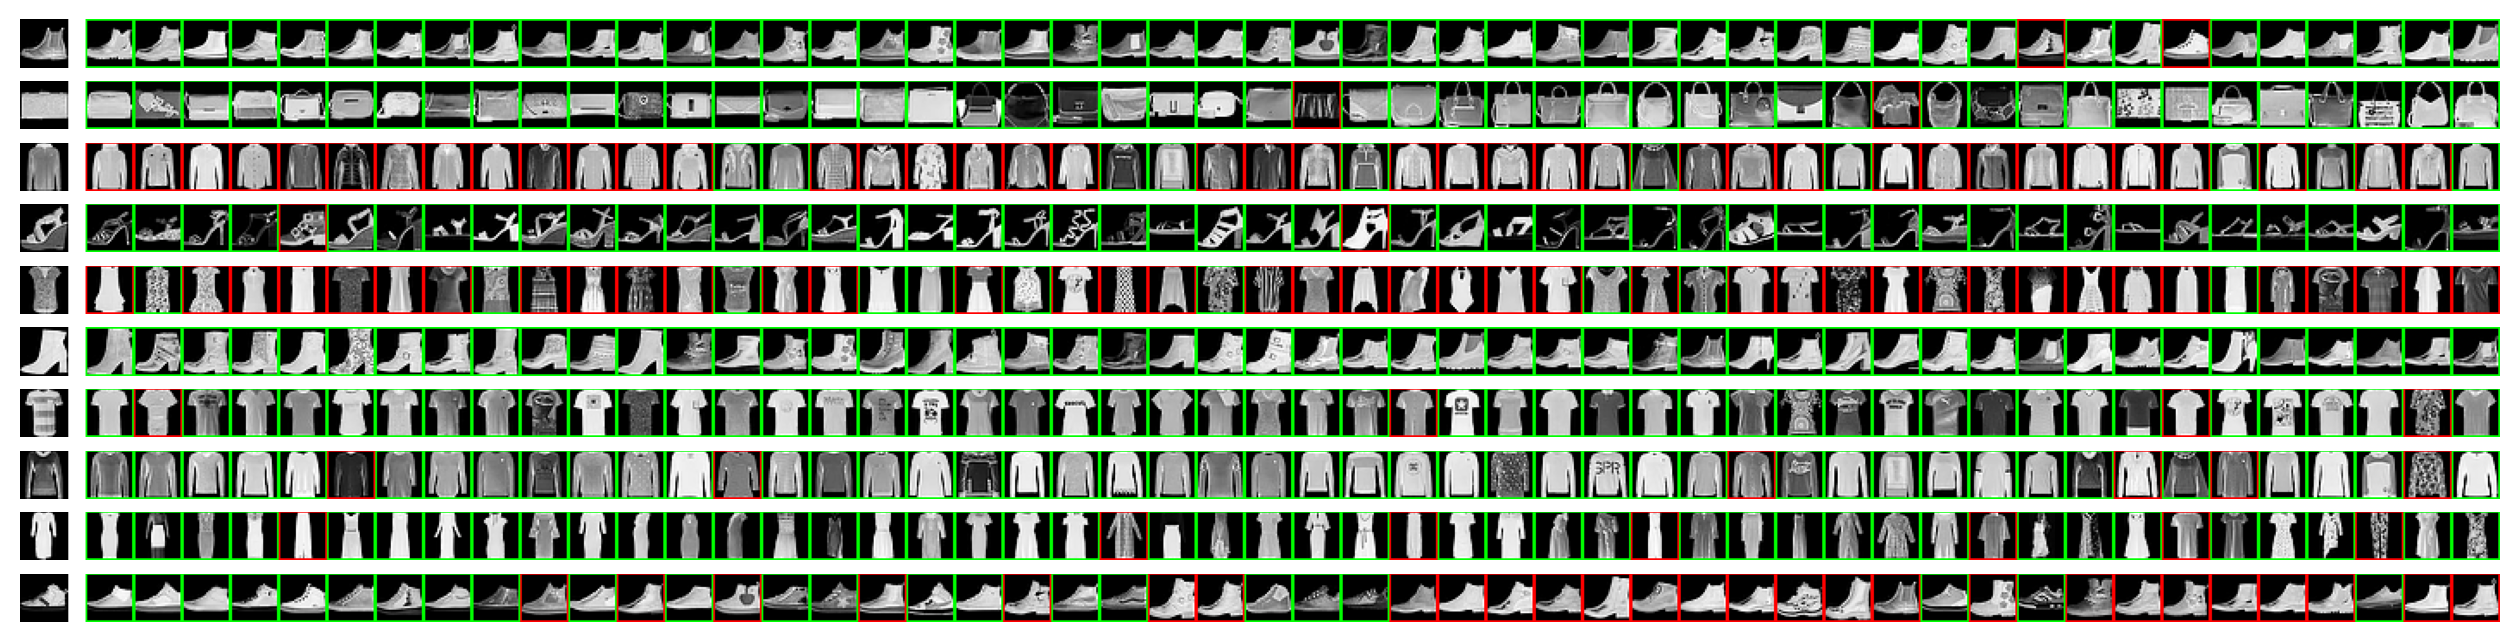

In [22]:
retrieve_for(load_net('./models/net_class.pl'), test_set, 'class')

features = tensor[1000, 256] n=256000 (1.0Mb) x∈[0., 0.704] μ=0.016 σ=0.061 grad DivBackward0
labels = tensor[1000] i64 7.8Kb x∈[0, 9] μ=4.500 σ=2.874
dists = tensor[1000, 1000] n=1000000 (3.8Mb) x∈[0., 1.414] μ=0.971 σ=0.284 grad ViewBackward0
num_correct = array([45, 49, 16, 49,  9, 48, 39, 34, 38, 47])
mAP = tensor f64 0.597
mPrec = tensor[999] f64 7.8Kb x∈[0.099, 0.770] μ=0.253 σ=0.164
mRec = tensor[999] f64 7.8Kb x∈[0.008, 1.000] μ=0.850 σ=0.214


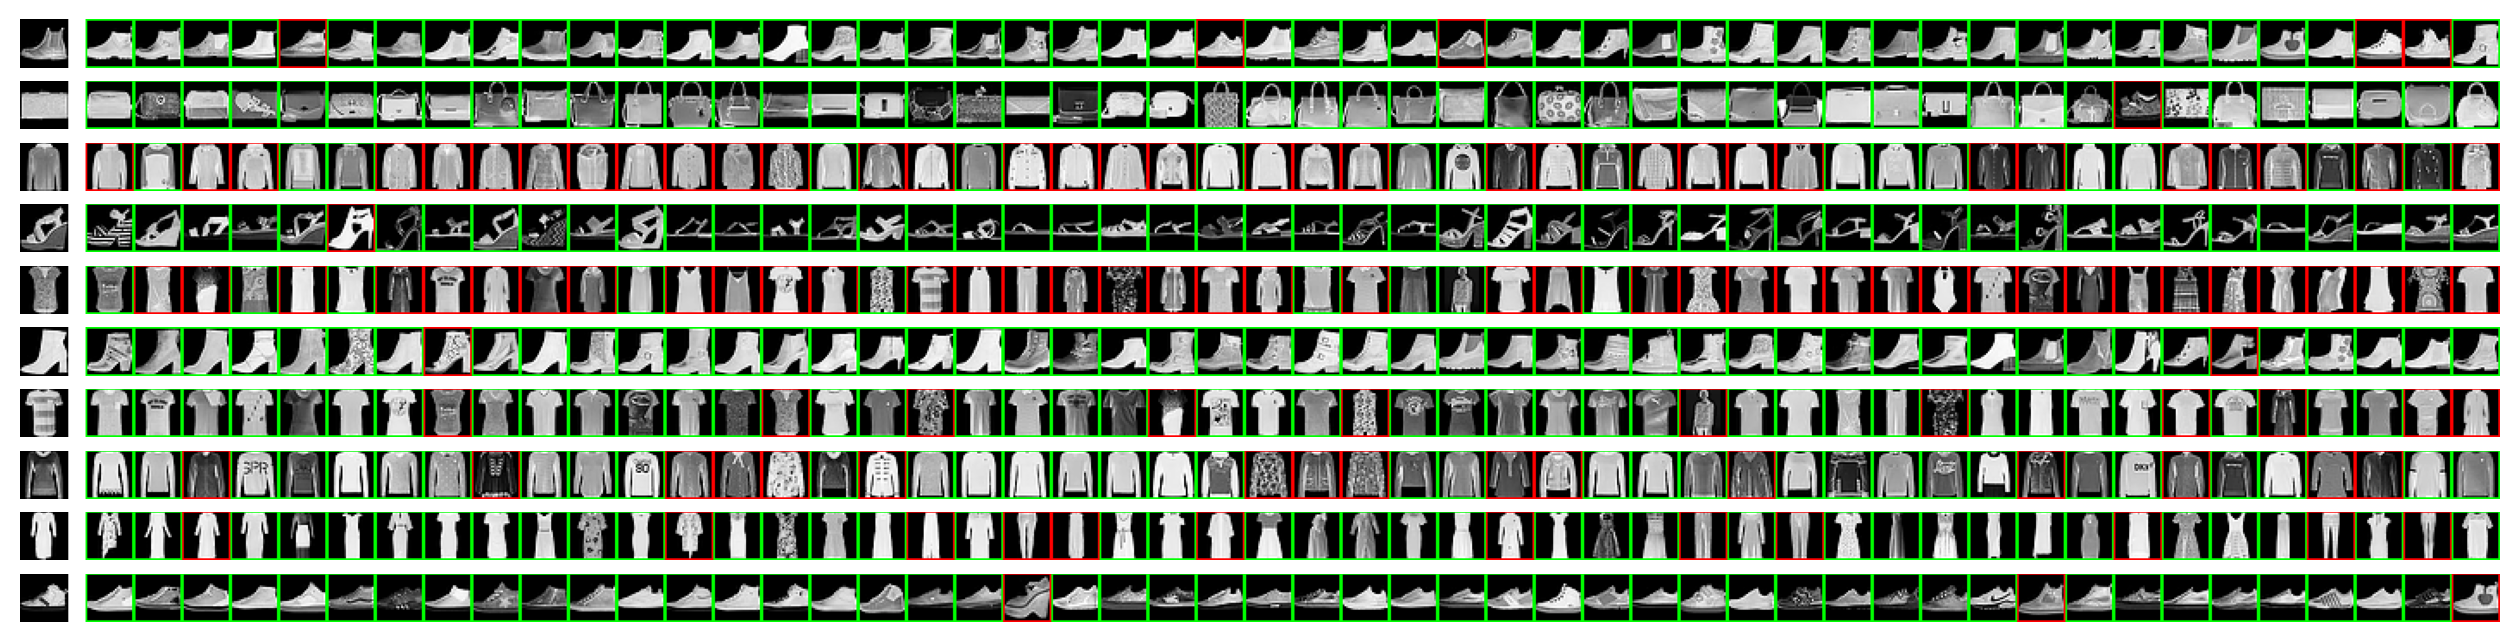

In [24]:
retrieve_for(load_net('./models/net_triplet.pl'), test_set, 'triplet')

features = tensor[1000, 256] n=256000 (1.0Mb) x∈[0., 0.416] μ=0.027 σ=0.056 grad DivBackward0
labels = tensor[1000] i64 7.8Kb x∈[0, 9] μ=4.500 σ=2.874
dists = tensor[1000, 1000] n=1000000 (3.8Mb) x∈[0., 1.060] μ=0.394 σ=0.179 grad ViewBackward0
num_correct = array([37, 50, 18, 37,  4, 49, 28,  2, 24, 25])
mAP = tensor f64 0.419
mPrec = tensor[999] f64 7.8Kb x∈[0.099, 0.600] μ=0.206 σ=0.116
mRec = tensor[999] f64 7.8Kb x∈[0.006, 1.000] μ=0.744 σ=0.227


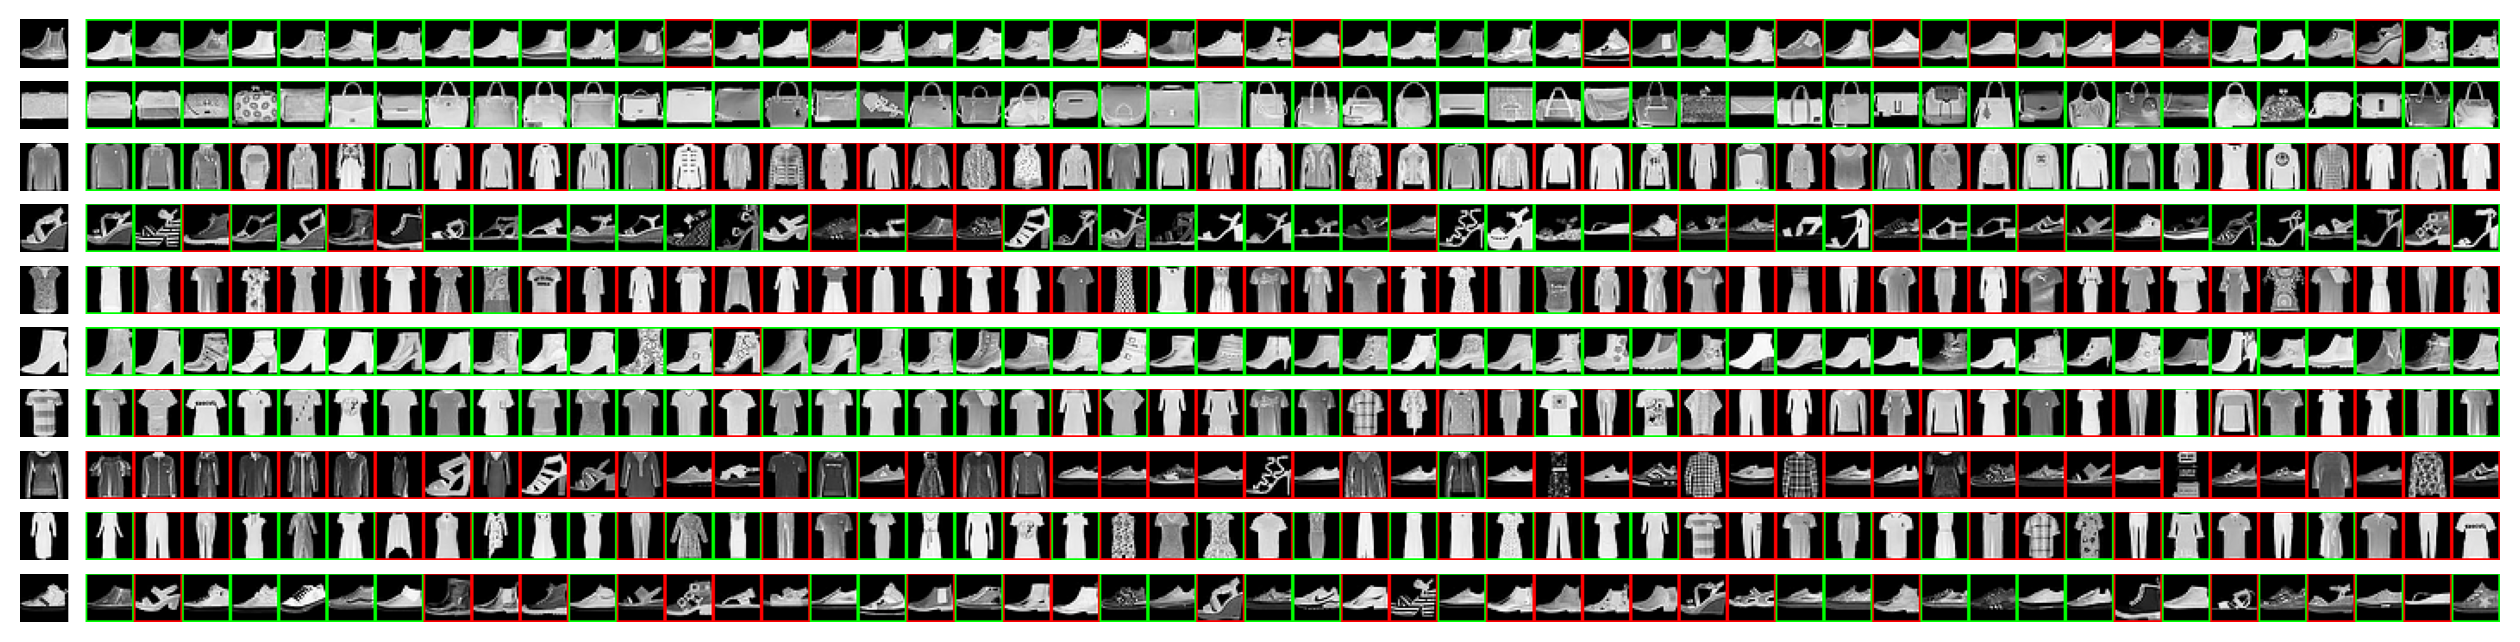

In [23]:
retrieve_for(load_net('./models/net_smoothAP.pl'), test_set, 'smoothAP')

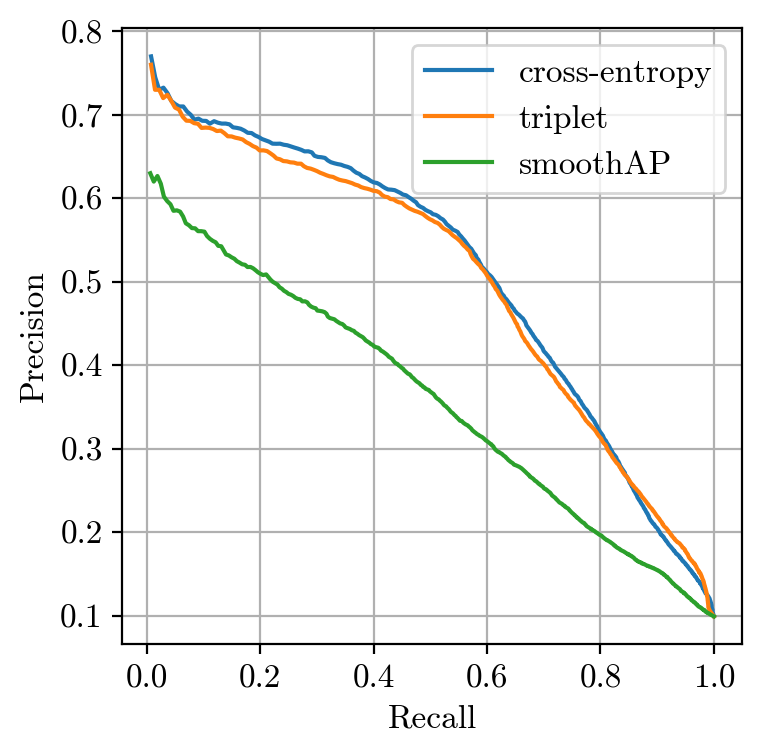

In [25]:
# VoMi: plot Precision vs. Recall for all three models

net = load_net('./models/net_class.pl') # load pretrained classification network
mAP_clf, mPrec_clf, mRec_clf = lab.evaluate_mAP(net, test_set)
net = load_net('./models/net_triplet.pl') # load network trained with triplet loss
mAP_triplet, mPrec_triplet, mRec_triplet = lab.evaluate_mAP(net, test_set)
net = load_net('./models/net_smoothAP.pl') # load network trained with smoothAP loss
mAP_ap, mPrec_ap, mRec_ap = lab.evaluate_mAP(net, test_set)

fig = plt.figure(figsize=(4, 4), dpi=200)
plt.plot(mRec_clf, mPrec_clf, label="cross-entropy")
plt.plot(mRec_triplet, mPrec_triplet, label="triplet")
plt.plot(mRec_ap, mPrec_ap, label="smoothAP")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# Training stuff

In [ ]:
# Triplets        
#import lab
#net = lab.new_net()
#print('Training triplets')
#train_triplets_data = lab.train_triplets(net, lab.train_loader, epochs=20, name=lab.model_names[1])
#print(f'{train_triplets_data = }')

In [ ]:
#import lab
#net = lab.new_net()
#print('Training smoothAP')
#train_smooth_data = lab.train_smooth_AP(net, lab.train_loader, epochs=20, name=lab.model_names[2])
#print(f'{train_smooth_data = }')

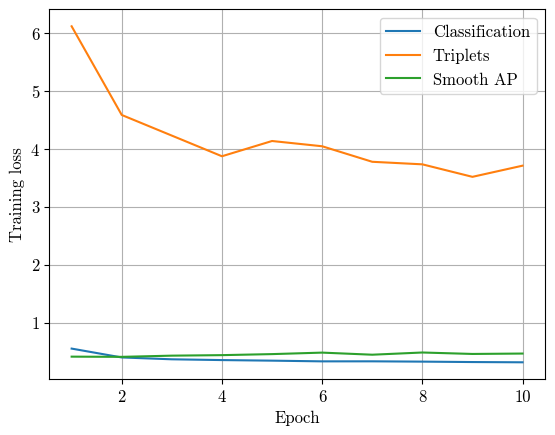

In [19]:
def plot_training_metric(classification, triplets, smooth, metric, ylabel):
    num_epochs = len(triplets[metric])
    x_axis = np.arange(1, 1 + num_epochs)
    plt.plot(x_axis, classification[metric], label='Classification')
    plt.plot(x_axis, triplets[metric], label='Triplets')
    plt.plot(x_axis, smooth[metric], label='Smooth AP')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    save_jpg(f'figures/{metric}.jpg')

import pickle
with open('pickle/train-triplets.pickle', 'rb') as file:
    train_triplets_data = pickle.load(file)

with open('pickle/train-smoothAP.pickle', 'rb') as file:
    train_smooth_data = pickle.load(file)

with open('pickle/train-class.pickle', 'rb') as file:
    train_class_data = pickle.load(file)

plot_training_metric(train_class_data, train_triplets_data, train_smooth_data, 'train_loss', 'Training loss')


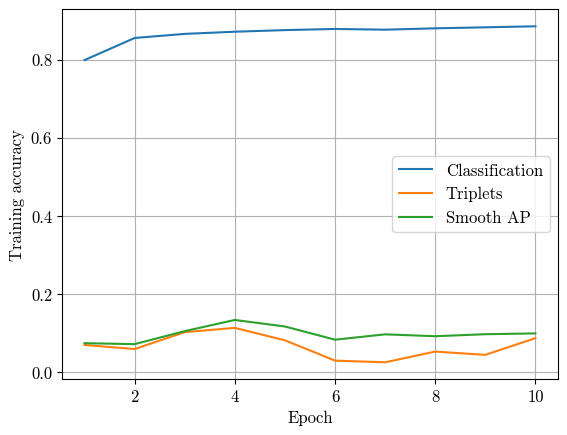

In [20]:
plot_training_metric(train_class_data, train_triplets_data, train_smooth_data, 'train_acc', 'Training accuracy')

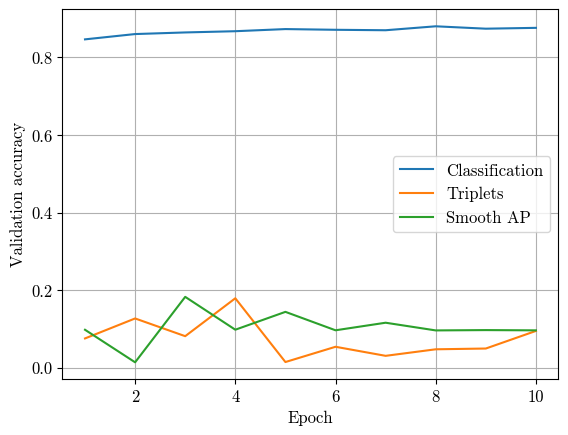

In [21]:
plot_training_metric(train_class_data, train_triplets_data, train_smooth_data, 'val_acc', 'Validation accuracy')